In [ ]:
#loading required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import binarize
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import zscore
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score,f1_score
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import precision_recall_fscore_support
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import StratifiedKFold,cross_val_score,KFold
from imblearn.over_sampling import SMOTE,ADASYN
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
# Rename the imported functions to avoid conflicts
# Changed from: from scipy.stats import randint as sp_randint_
from scipy.stats import randint
# Changed from: from scipy.stats import uniform as sp_uniform_
from scipy.stats import uniform
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn import metrics
import seaborn as sns
sns.set(color_codes=True)
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
# The issue was caused by using custom variable names
# that potentially clashed with pandas internal settings.
# Reverting to the correct option names should fix the issue.
pd.set_option('display.max_columns',None) # Changed from: pd.set_option('max_columns',None)
pd.set_option('display.max_rows',None)   # Changed from: pd.set_option('max_rows',None)

In [16]:
com = pd.read_csv('/content/signal-data.csv')
com=com.drop(['Time'],axis=1)
row, column = com.shape
print('The complete dataset contains', row, 'rows and', column, 'columns')

The complete dataset contains 1567 rows and 591 columns


In [17]:
sg=com.iloc[0:1567,:]
row,column=sg.shape
print('The past dataset contains', row, 'rows and', column, 'columns')

The past dataset contains 1567 rows and 591 columns


In [18]:
val=com.iloc[1567:1586,:]
row,column=val.shape
print('The validation dataset contains', row, 'rows and', column, 'columns')

The validation dataset contains 0 rows and 591 columns


In [19]:
#counting the number of missing values in each column
com.isnull().sum()

0               6
1               7
2              14
3              14
4              14
5              14
6              14
7               9
8               2
9               2
10              2
11              2
12              2
13              3
14              3
15              3
16              3
17              3
18              3
19             10
20              0
21              2
22              2
23              2
24              2
25              2
26              2
27              2
28              2
29              2
30              2
31              2
32              1
33              1
34              1
35              1
36              1
37              1
38              1
39              1
40             24
41             24
42              1
43              1
44              1
45              1
46              1
47              1
48              1
49              1
50              1
51              1
52              1
53              4
54              4
55              4
56              4
57              4
58              4
59              7
60              6
61              6
62              6
63              7
64              7
65              7
66              6
67              6
68              6
69              6
70              6
71              6
72            794
73            794
74              6
75             24
76             24
77             24
78             24
79             24
80             24
81             24
82             24
83              1
84             12
85           1341
86              0
87              0
88              0
89             51
90             51
91              6
92              2
93              2
94              6
95              6
96              6
97              6
98              6
99              6
100             6
101             6
102             6
103             2
104             2
105             6
106             6
107             6
108             6
109          1018
110          1018
111          1018
112           715
113             0
114             0
115             0
116             0
117             0
118            24
119             0
120             0
121             9
122             9
123             9
124             9
125             9
126             9
127             9
128             9
129             9
130             9
131             9
132             8
133             8
134             8
135             5
136             6
137             7
138            14
139            14
140            14
141            14
142            14
143             9
144             2
145             2
146             2
147             2
148             2
149             3
150             3
151             3
152             3
153             3
154             3
155            10
156             0
157          1429
158          1429
159             2
160             2
161             2
162             2
163             2
164             2
165             2
166             2
167             2
168             2
169             2
170             1
171             1
172             1
173             1
174             1
175             1
176             1
177             1
178            24
179             1
180             1
181             1
182             1
183             1
184             1
185             1
186             1
187             1
188             1
189             1
190             4
191             4
192             4
193             4
194             4
195             4
196             7
197             6
198             6
199             6
200             7
201             7
202             7
203             6
204             6
205             6
206             6
207             6
208             6
209             6
210            24
211            24
212            24
213            24
214            24
215            24
216            24
217            24
218             1
219            12
220          1341
221             0
222 

In [20]:
#5-point summary
com.describe().T

count         mean          std         min          25%  \
0          1561.0  3014.452896    73.621787   2743.2400  2966.260000   
1          1560.0  2495.850231    80.407705   2158.7500  2452.247500   
2          1553.0  2200.547318    29.513152   2060.6600  2181.044400   
3          1553.0  1396.376627   441.691640      0.0000  1081.875800   
4          1553.0     4.197013    56.355540      0.6815     1.017700   
5          1553.0   100.000000     0.000000    100.0000   100.000000   
6          1553.0   101.112908     6.237214     82.1311    97.920000   
7          1558.0     0.121822     0.008961      0.0000     0.121100   
8          1565.0     1.462862     0.073897      1.1910     1.411200   
9          1565.0    -0.000841     0.015116     -0.0534    -0.010800   
10         1565.0     0.000146     0.009302     -0.0349    -0.005600   
11         1565.0     0.964353     0.012452      0.6554     0.958100   
12         1565.0   199.956809     3.257276    182.0940   198.130700   
13         1564.0     0.000000     0.000000      0.0000     0.000000   
14         1564.0     9.005371     2.796596      2.2493     7.094875   
15         1564.0   413.086035    17.221095    333.4486   406.127400   
16         1564.0     9.907603     2.403867      4.4696     9.567625   
17         1564.0     0.971444     0.012062      0.5794     0.968200   
18         1564.0   190.047354     2.781041    169.1774   188.299825   
19         1557.0    12.481034     0.217965      9.8773    12.460000   
20         1567.0     1.405054     0.016737      1.1797     1.396500   
21         1565.0 -5618.393610   626.822178  -7150.2500 -5933.250000   
22         1565.0  2699.378435   295.498535      0.0000  2578.000000   
23         1565.0 -3806.299734  1380.162148  -9986.7500 -4371.750000   
24         1565.0  -298.598136  2902.690117 -14804.5000 -1476.000000   
25         1565.0     1.203845     0.177600      0.0000     1.094800   
26         1565.0     1.938477     0.189495      0.0000     1.906500   
27         1565.0     6.638628     1.244249      0.0000     5.263700   
28         1565.0    69.499532     3.461181     59.4000    67.377800   
29         1565.0     2.366197     0.408694      0.6667     2.088900   
30         1565.0     0.184159     0.032944      0.0341     0.161700   
31         1565.0     3.673189     0.535322      2.0698     3.362700   
32         1566.0    85.337469     2.026549     83.1829    84.490500   
33         1566.0     8.960279     1.344456      7.6032     8.580000   
34         1566.0    50.582639     1.182618     49.8348    50.252350   
35         1566.0    64.555787     2.574749     63.6774    64.024800   
36         1566.0    49.417370     1.182619     40.2289    49.421200   
37         1566.0    66.221274     0.304141     64.9193    66.040650   
38         1566.0    86.836577     0.446756     84.7327    86.578300   
39         1566.0   118.679554     1.807221    111.7128   118.015600   
40         1543.0    67.904909    24.062943      1.4340    74.800000   
41         1543.0     3.353066     2.360425     -0.0759     2.690000   
42         1566.0    70.000000     0.000000     70.0000    70.000000   
43         1566.0   355.538904     6.234706    342.7545   350.801575   
44         1566.0    10.031165     0.175038      9.4640     9.925425   
45         1566.0   136.743060     7.849247    108.8464   130.728875   
46         1566.0   733.672811    12.170315    699.8139   724.442300   
47         1566.0     1.177958     0.189637      0.4967     0.985000   
48         1566.0   139.972231     4.524251    125.7982   136.926800   
49         1566.0     1.000000     0.000000      1.0000     1.000000   
50         1566.0   632.254197     8.643985    607.3927   625.928425   
51         1566.0   157.420991    60.925108     40.2614   115.508975   
52         1566.0     0.000000     0.000000      0.0000     0.000000   
53         1563.0     4.592971     0.054950      3.7060     4.574000   
54         1563.0     4.838523     0.059581      3.9

In [21]:
#dropping the columns the have constant signal
cols = com.select_dtypes([np.number]).columns
std = com[cols].std()
cols_to_drop = std[std==0].index
com.drop(cols_to_drop, axis=1,inplace=True)
com.head()

0        1          2          3       4         6       7       8  \
0  3030.93  2564.00  2187.7333  1411.1265  1.3602   97.6133  0.1242  1.5005   
1  3095.78  2465.14  2230.4222  1463.6606  0.8294  102.3433  0.1247  1.4966   
2  2932.61  2559.94  2186.4111  1698.0172  1.5102   95.4878  0.1241  1.4436   
3  2988.72  2479.90  2199.0333   909.7926  1.3204  104.2367  0.1217  1.4882   
4  3032.24  2502.87  2233.3667  1326.5200  1.5334  100.3967  0.1235  1.5031   

        9      10      11        12       14        15       16      17  \
0  0.0162 -0.0034  0.9455  202.4396   7.9558  414.8710  10.0433  0.9680   
1 -0.0005 -0.0148  0.9627  200.5470  10.1548  414.7347   9.2599  0.9701   
2  0.0041  0.0013  0.9615  202.0179   9.5157  416.7075   9.3144  0.9674   
3 -0.0124 -0.0033  0.9629  201.8482   9.6052  422.2894   9.6924  0.9687   
4 -0.0031 -0.0072  0.9569  201.9424  10.5661  420.5925  10.3387  0.9735   

         18       19      20       21       22       23       24      25  \
0  192.3963  12.5190  1.4026 -5419.00  2916.50 -4043.75   751.00  0.8955   
1  191.2872  12.4608  1.3825 -5441.50  2604.25 -3498.75 -1640.25  1.2973   
2  192.7035  12.5404  1.4123 -5447.75  2701.75 -4047.00 -1916.50  1.3122   
3  192.1557  12.4782  1.4011 -5468.25  2648.25 -4515.00 -1657.25  1.3137   
4  191.6037  12.4735  1.3888 -5476.25  2635.25 -3987.50   117.00  1.2887   

       26      27       28      29      30      31       32      33       34  \
0  1.7730  3.0490  64.2333  2.0222  0.1632  3.5191  83.3971  9.5126  50.6170   
1  2.0143  7.3900  68.4222  2.2667  0.2102  3.4171  84.9052  9.7997  50.6596   
2  2.0295  7.5788  67.1333  2.3333  0.1734  3.5986  84.7569  8.6590  50.1530   
3  2.0038  7.3145  62.9333  2.6444  0.2071  3.3813  84.9105  8.6789  50.5100   
4  1.9912  7.2748  62.8333  3.1556  0.2696  3.2728  86.3269  8.7677  50.2480   

        35       36       37       38        39     40     41        43  \
0  64.2588  49.3830  66.3141  86.9555  117.5132  61.29  4.515  352.7173   
1  64.2828  49.3404  64.9193  87.5241  118.1188  78.25  2.773  352.2445   
2  64.1114  49.8470  65.8389  84.7327  118.6128  14.37  5.434  364.3782   
3  64.1125  49.4900  65.1951  86.6867  117.0442  76.90  1.279  363.0273   
4  64.1511  49.7520  66.1542  86.1468  121.4364  76.39  2.209  353.3400   

        44        45        46      47        48        50        51     53  \
0  10.1841  130.3691  723.3092  1.3072  141.2282  624.3145  218.3174  4.592   
1  10.0373  133.1727  724.8264  1.2887  145.8445  631.2618  205.1695  4.590   
2   9.8783  131.8027  734.7924  1.2992  141.0845  637.2655  185.7574  4.486   
3   9.9305  131.8027  733.8778  1.3027  142.5427  637.3727  189.9079  4.486   
4  10.4091  176.3136  789.7523  1.0341  138.0882  667.7418  233.5491  4.624   

      54      55      56      57      58       59        60       61  \
0  4.841  2834.0  0.9317  0.9484  4.7057  -1.7264  350.9264  10.6231   
1  4.842  2853.0  0.9324  0.9479  4.6820   0.8073  352.0073  10.3092   
2  4.748  2936.0  0.9139  0.9447  4.5873  23.8245  364.5364  10.1685   
3  4.748  2936.0  0.9139  0.9447  4.5873  24.3791  361.4582  10.2112   
4  4.894  2865.0  0.9298  0.9449  4.6414 -12.2945  355.0809   9.7948   

         62       63       64       65        66      67        68        70  \
0  108.6427  16.1445  21.7264  29.5367  693.7724  0.9226  148.6009  608.1700   
1  113.9800  10.9036  19.1927  27.6301  697.1964  1.1598  154.3709  620.3582   
2  115.6273  11.3019  16.1755  24.2829  710.5095  0.8694  145.8000  625.9636   
3  116.1818  13.5597  15.6209  23.4736  710.4043  0.9761  147.6545  625.2945   
4  144.0191  21.9782  32.2945  44.1498  745.6025  0.9256  146.6636  645.7636   

        71        72        73   74      75      76      77      78      79  \
0  84.0793       NaN       NaN  0.0  0.0126 -0.0206  0.0141 -0.0307 -0.0083   
1  82.3494       NaN       NaN  0.0 -0.0039 -0.0198  0.0004 -0.0440 -0.0358   
2  84.7681  140.6972  485.2665  0.0 -0.0078 -0.0326 -0.0052  0.0213 

In [22]:
#attribute type( except the target all the variables are float)
com.dtypes

0            float64
1            float64
2            float64
3            float64
4            float64
6            float64
7            float64
8            float64
9            float64
10           float64
11           float64
12           float64
14           float64
15           float64
16           float64
17           float64
18           float64
19           float64
20           float64
21           float64
22           float64
23           float64
24           float64
25           float64
26           float64
27           float64
28           float64
29           float64
30           float64
31           float64
32           float64
33           float64
34           float64
35           float64
36           float64
37           float64
38           float64
39           float64
40           float64
41           float64
43           float64
44           float64
45           float64
46           float64
47           float64
48           float64
50           float64
51           float64
53           float64
54           float64
55           float64
56           float64
57           float64
58           float64
59           float64
60           float64
61           float64
62           float64
63           float64
64           float64
65           float64
66           float64
67           float64
68           float64
70           float64
71           float64
72           float64
73           float64
74           float64
75           float64
76           float64
77           float64
78           float64
79           float64
80           float64
81           float64
82           float64
83           float64
84           float64
85           float64
86           float64
87           float64
88           float64
89           float64
90           float64
91           float64
92           float64
93           float64
94           float64
95           float64
96           float64
98           float64
99           float64
100          float64
101          float64
102          float64
103          float64
104          float64
105          float64
106          float64
107          float64
108          float64
109          float64
110          float64
111          float64
112          float64
113          float64
114          float64
115          float64
116          float64
117          float64
118          float64
119          float64
120          float64
121          float64
122          float64
123          float64
124          float64
125          float64
126          float64
127          float64
128          float64
129          float64
130          float64
131          float64
132          float64
133          float64
134          float64
135          float64
136          float64
137          float64
138          float64
139          float64
140          float64
142          float64
143          float64
144          float64
145          float64
146          float64
147          float64
148          float64
150          float64
151          float64
152          float64
153          float64
154          float64
155          float64
156          float64
157          float64
158          float64
159          float64
160          float64
161          float64
162          float64
163          float64
164          float64
165          float64
166          float64
167          float64
168          float64
169          float64
170          float64
171          float64
172          float64
173          float64
174          float64
175          float64
176          float64
177          float64
180          float64
181          float64
182          float64
183          float64
184          float64
185          float64
187          float64
188          float64
195          float64
196          float64
197          float64
198          float64
199          float64
200          float64
201          float64
202          float64
203          float64
204          float64
205          float64
206          float64
207          float64
208       

In [23]:
#after dropping the constant signal
row,column=com.shape
print('After dropping the constant signals the dataset contains', row, 'rows and', column, 'columns')

After dropping the constant signals the dataset contains 1567 rows and 475 columns


In [24]:
#checking for distribution of the target class shows that the data set is highly imbalanced
sg['Pass/Fail'].value_counts(normalize=True)

Pass/Fail
-1    0.933631
 1    0.066369
Name: proportion, dtype: float64

In [25]:
#label encoding the target class
com['Pass/Fail']=com['Pass/Fail'].replace([-1,1],[0,1])

In [26]:
# checking how many rows have missing values shows that all rows have atleast one missing value
rows=com.isnull().any(axis = 1).sum()
print( 'All the' ,rows,'rows have atleast one missing value')

All the 1567 rows have atleast one missing value


In [27]:
#replacing the NaN/NA with zero and considering it as no signal
com.fillna(0,inplace=True)

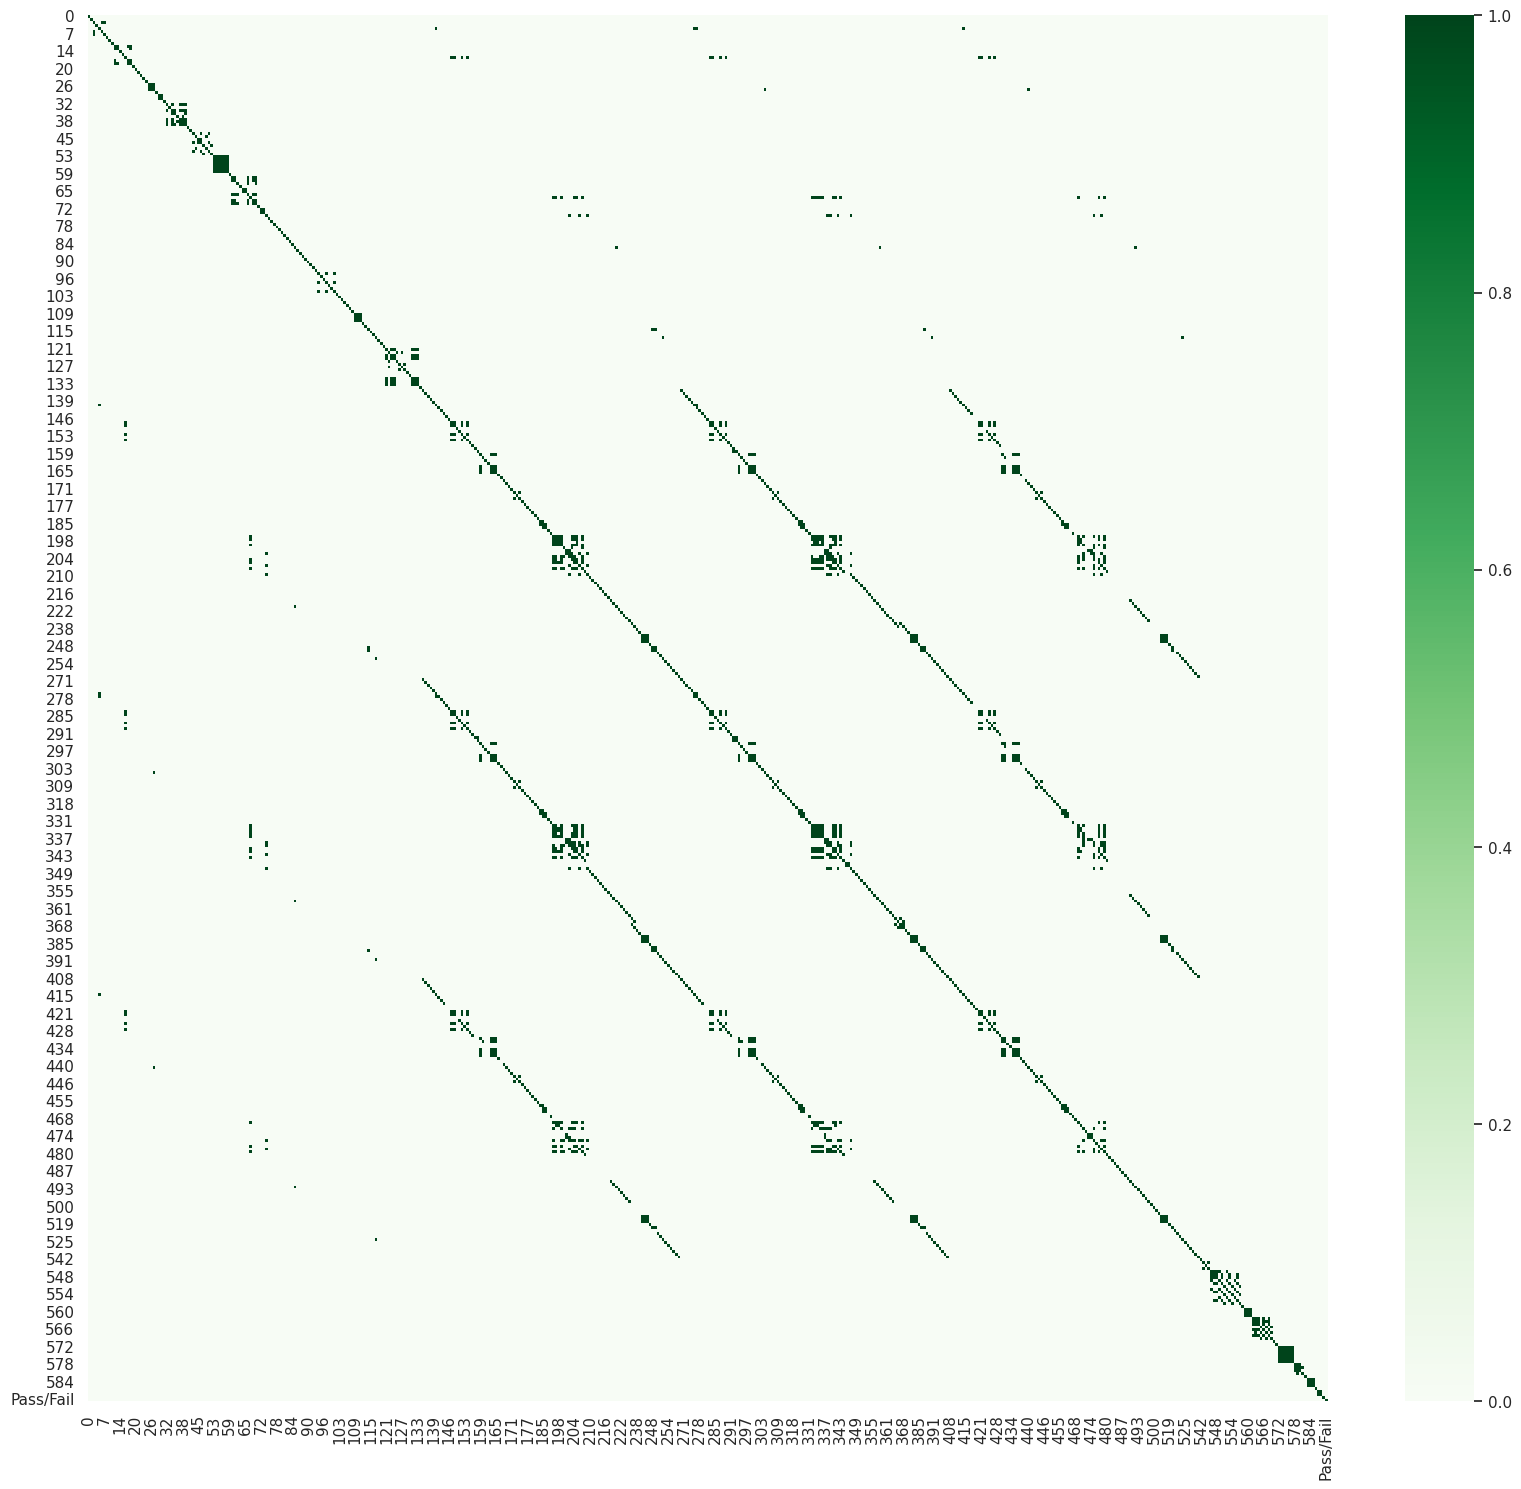

In [32]:
#checking for correlation
plt.figure(figsize=(20,18))
corr=com.corr()
sns.heatmap(abs(corr>0.7),cmap="Greens");

In [33]:
#making a copy of the dataset and dropping the target class
com1=com.copy()
com1.drop(['Pass/Fail'],axis=1,inplace=True)

In [34]:
# Create correlation matrix
corr_matrix = com1.corr().abs()

# Select upper triangle of correlation matrix
# Use bool instead of np.bool for compatibility with newer NumPy versions
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find features with correlation greater than 0.70
to_drop = [column for column in upper.columns if any(upper[column] > 0.70)]

# Drop features
com1.drop(to_drop, axis=1, inplace=True)

In [35]:
row,column=com1.shape
print('After dropping the correlated variables the dataset contains', row, 'rows and', column, 'columns')

After dropping the correlated variables the dataset contains 1567 rows and 195 columns


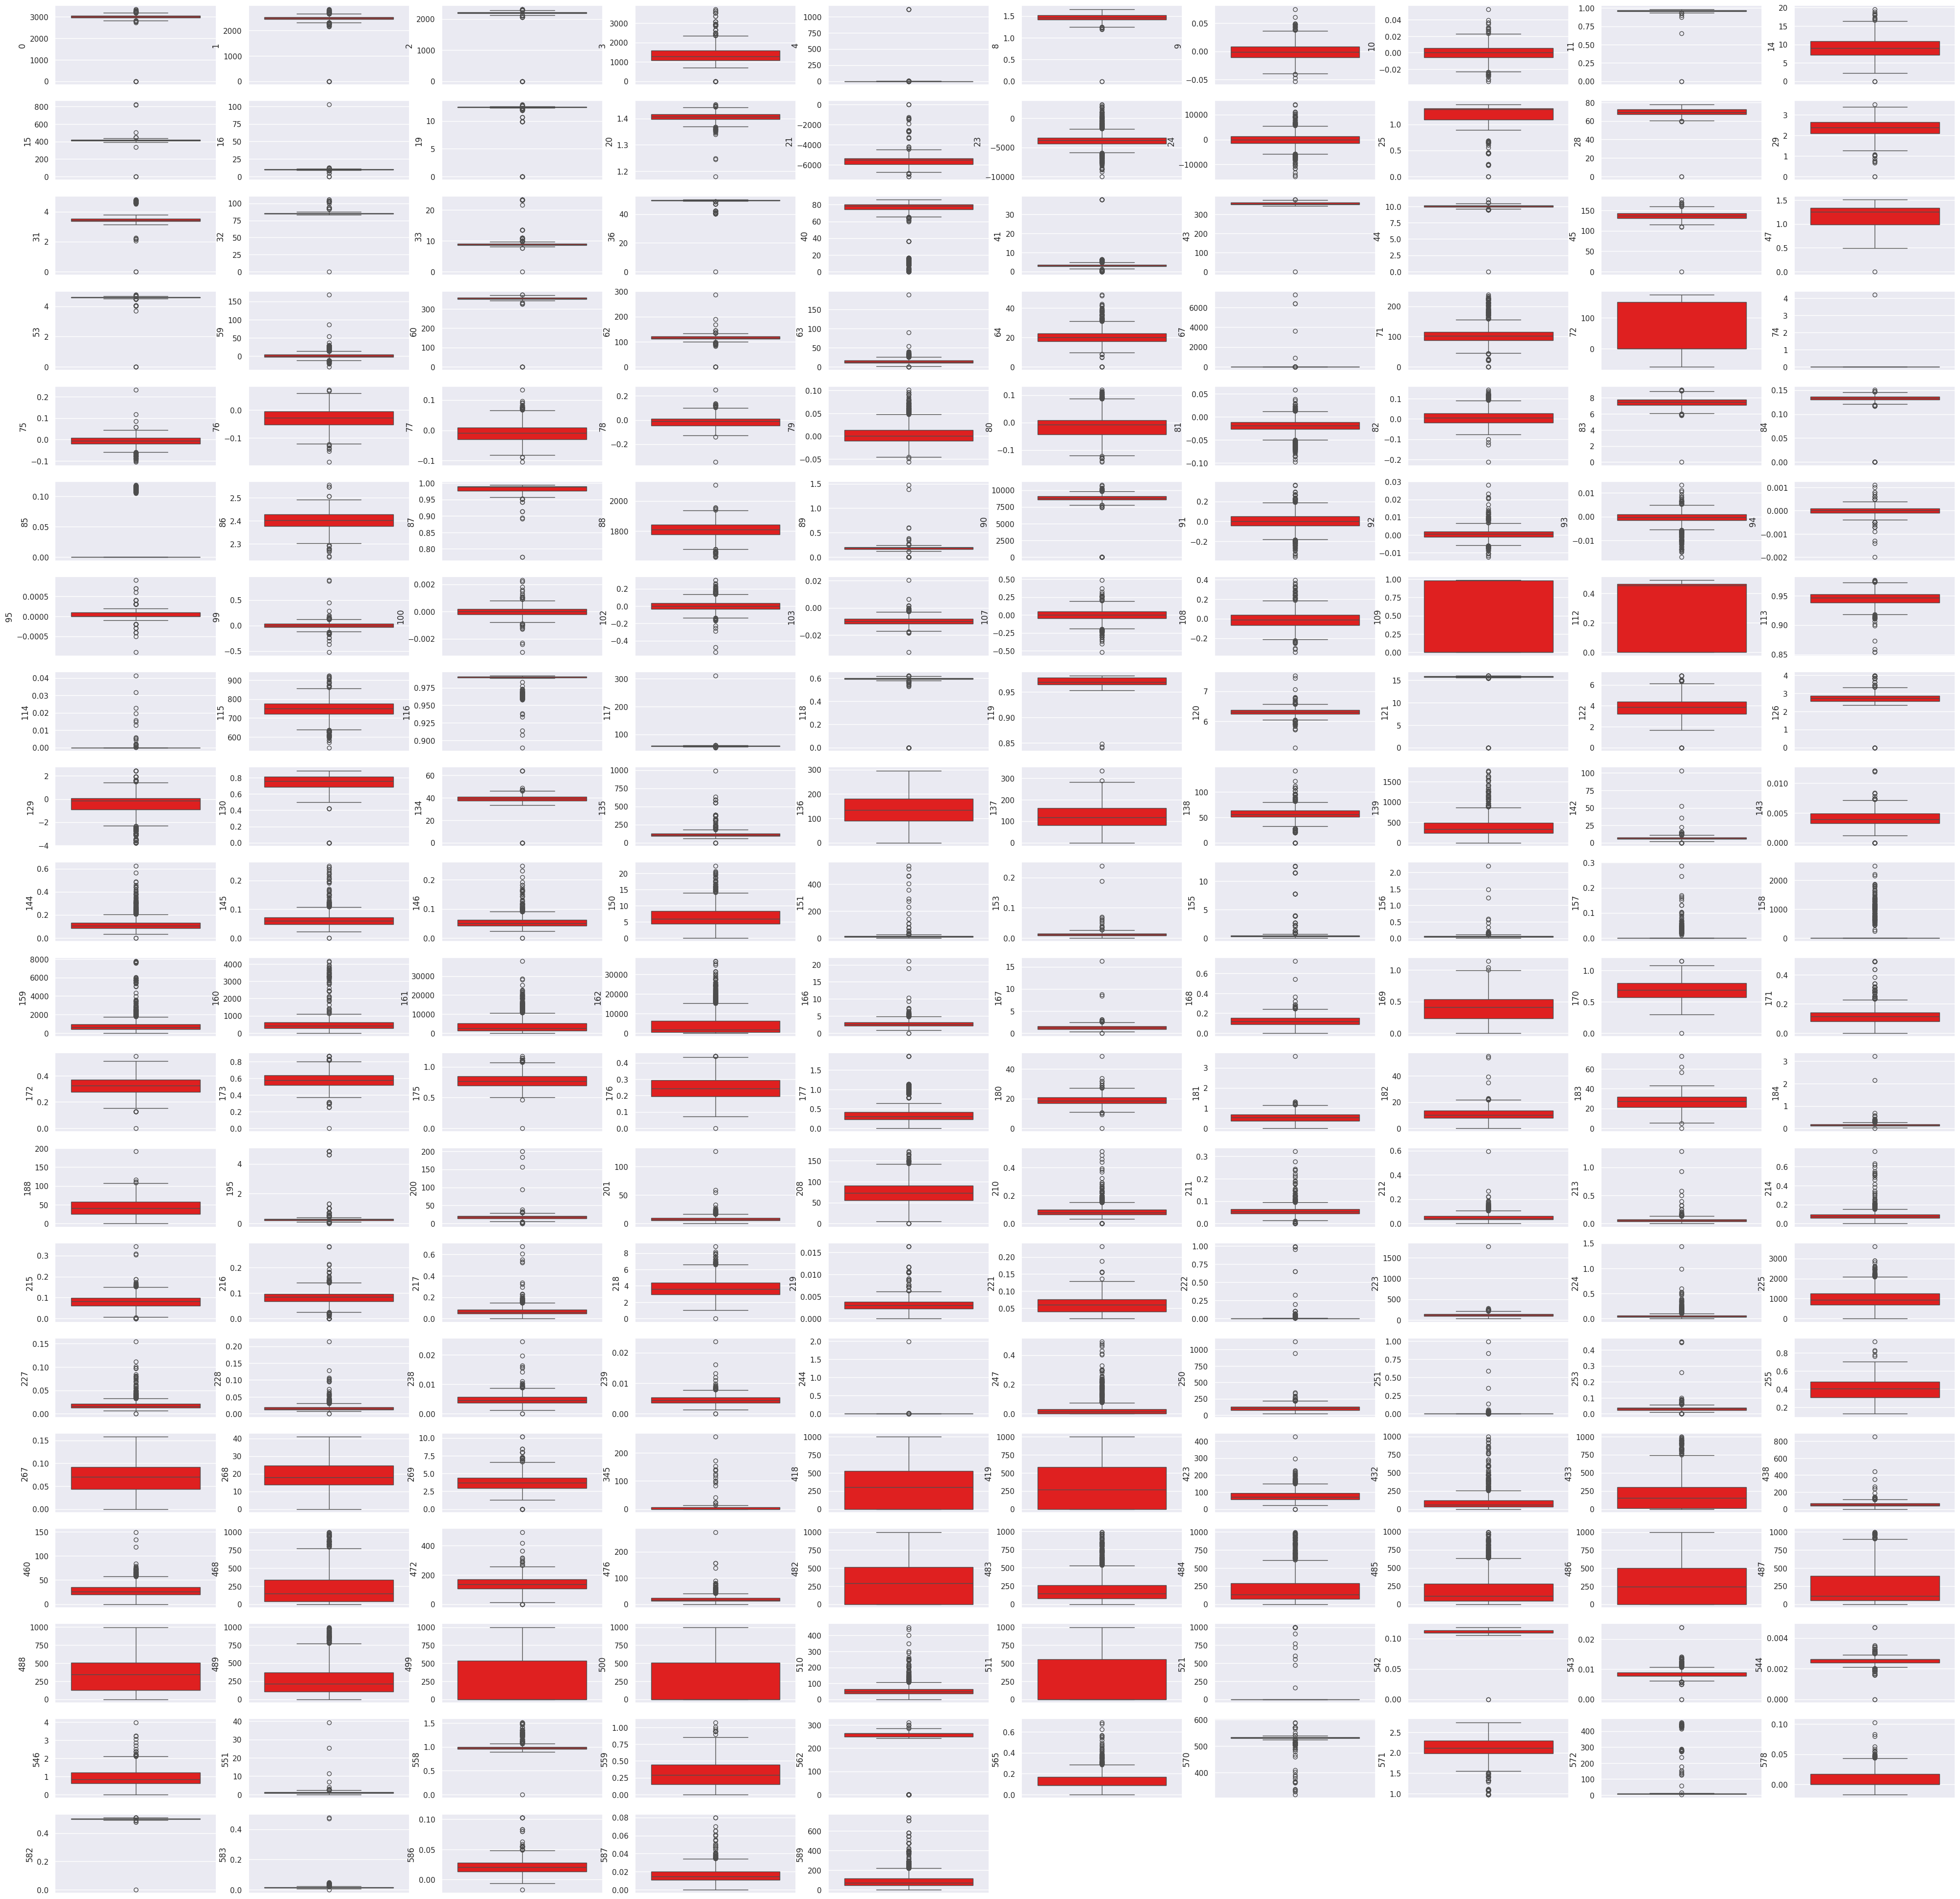

In [36]:
#Boxplot to check for outliers
plt.figure(figsize=(50, 50))
col = 1
for i in com1.columns:
    plt.subplot(20,10, col)
    sns.boxplot(com1[i],color='red')
    col += 1

In [37]:
#find the outliers and replace them by median
for i in com1.columns:
    q1 = com1[i].quantile(0.25)
    q3 = com1[i].quantile(0.75)
    iqr = q3 - q1

    low = q1 - 1.5 * iqr
    high = q3 + 1.5 * iqr

    com1.loc[(com1[i] < low) | (com1[i] > high), i] = com1[i].median()

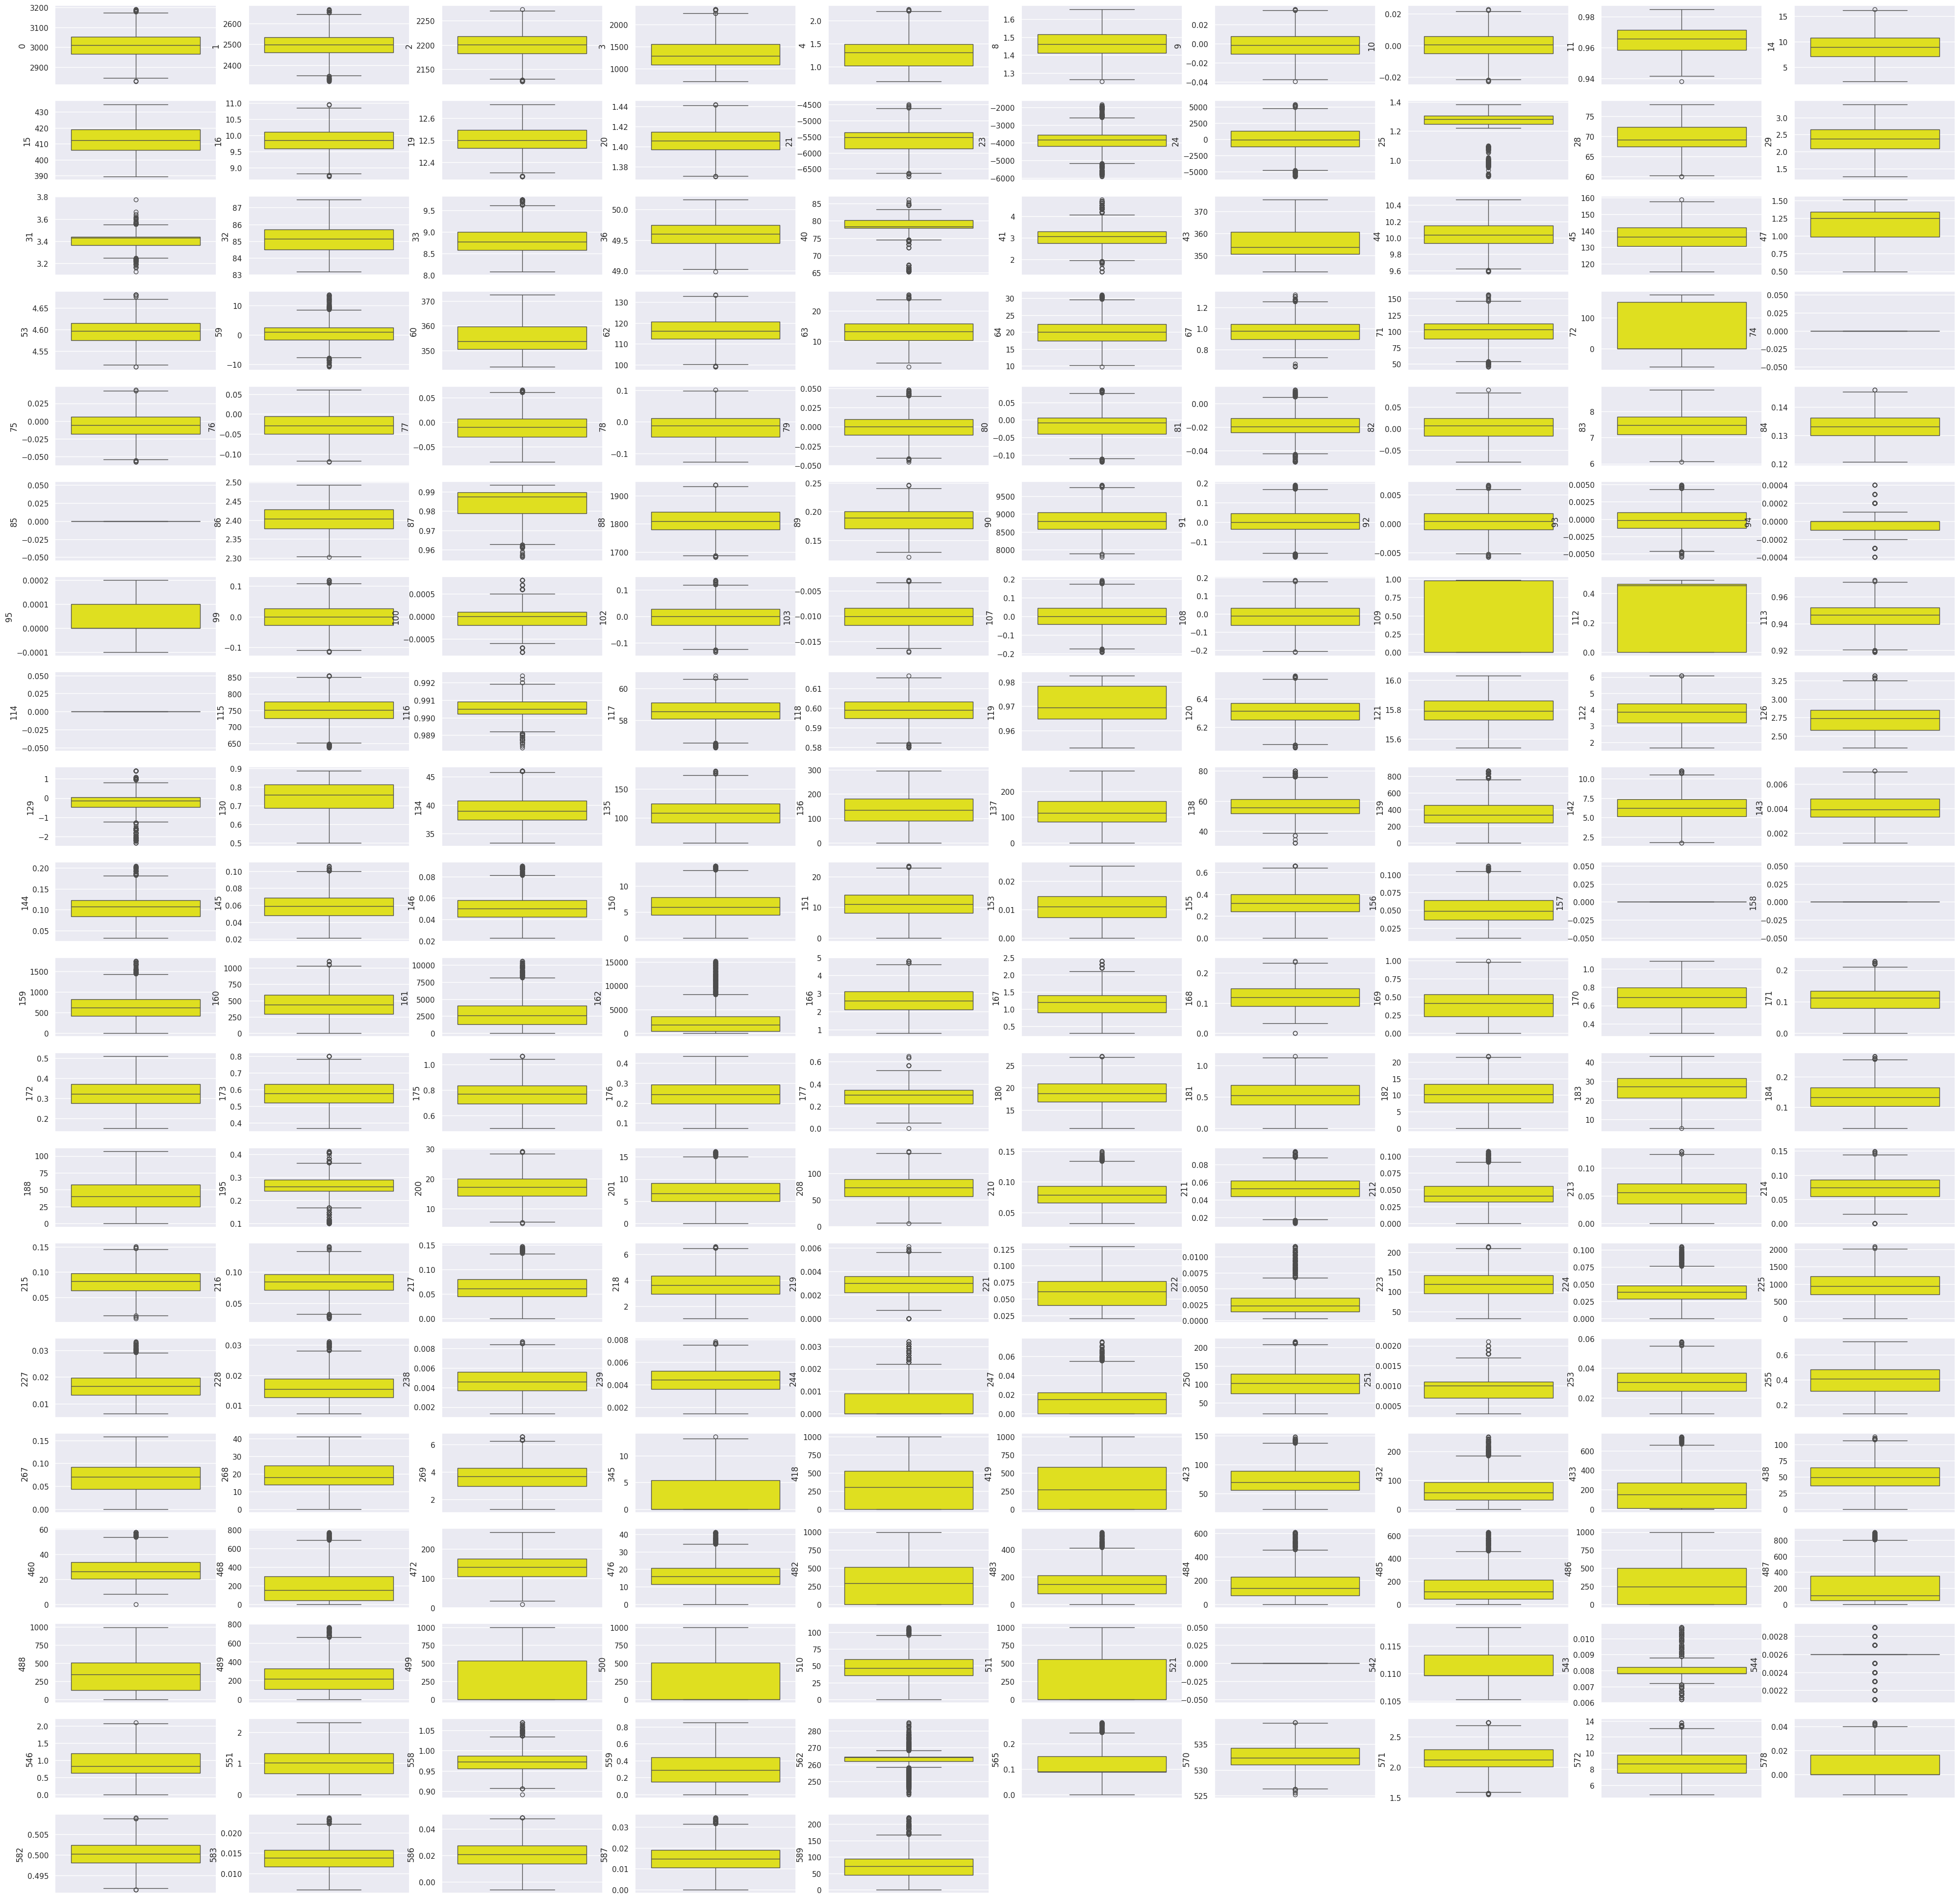

In [38]:
#After treating the outlier values
plt.figure(figsize=(50, 50))
col = 1
for i in com1.columns:
    plt.subplot(20,10, col)
    sns.boxplot(com1[i],color='yellow')
    col += 1

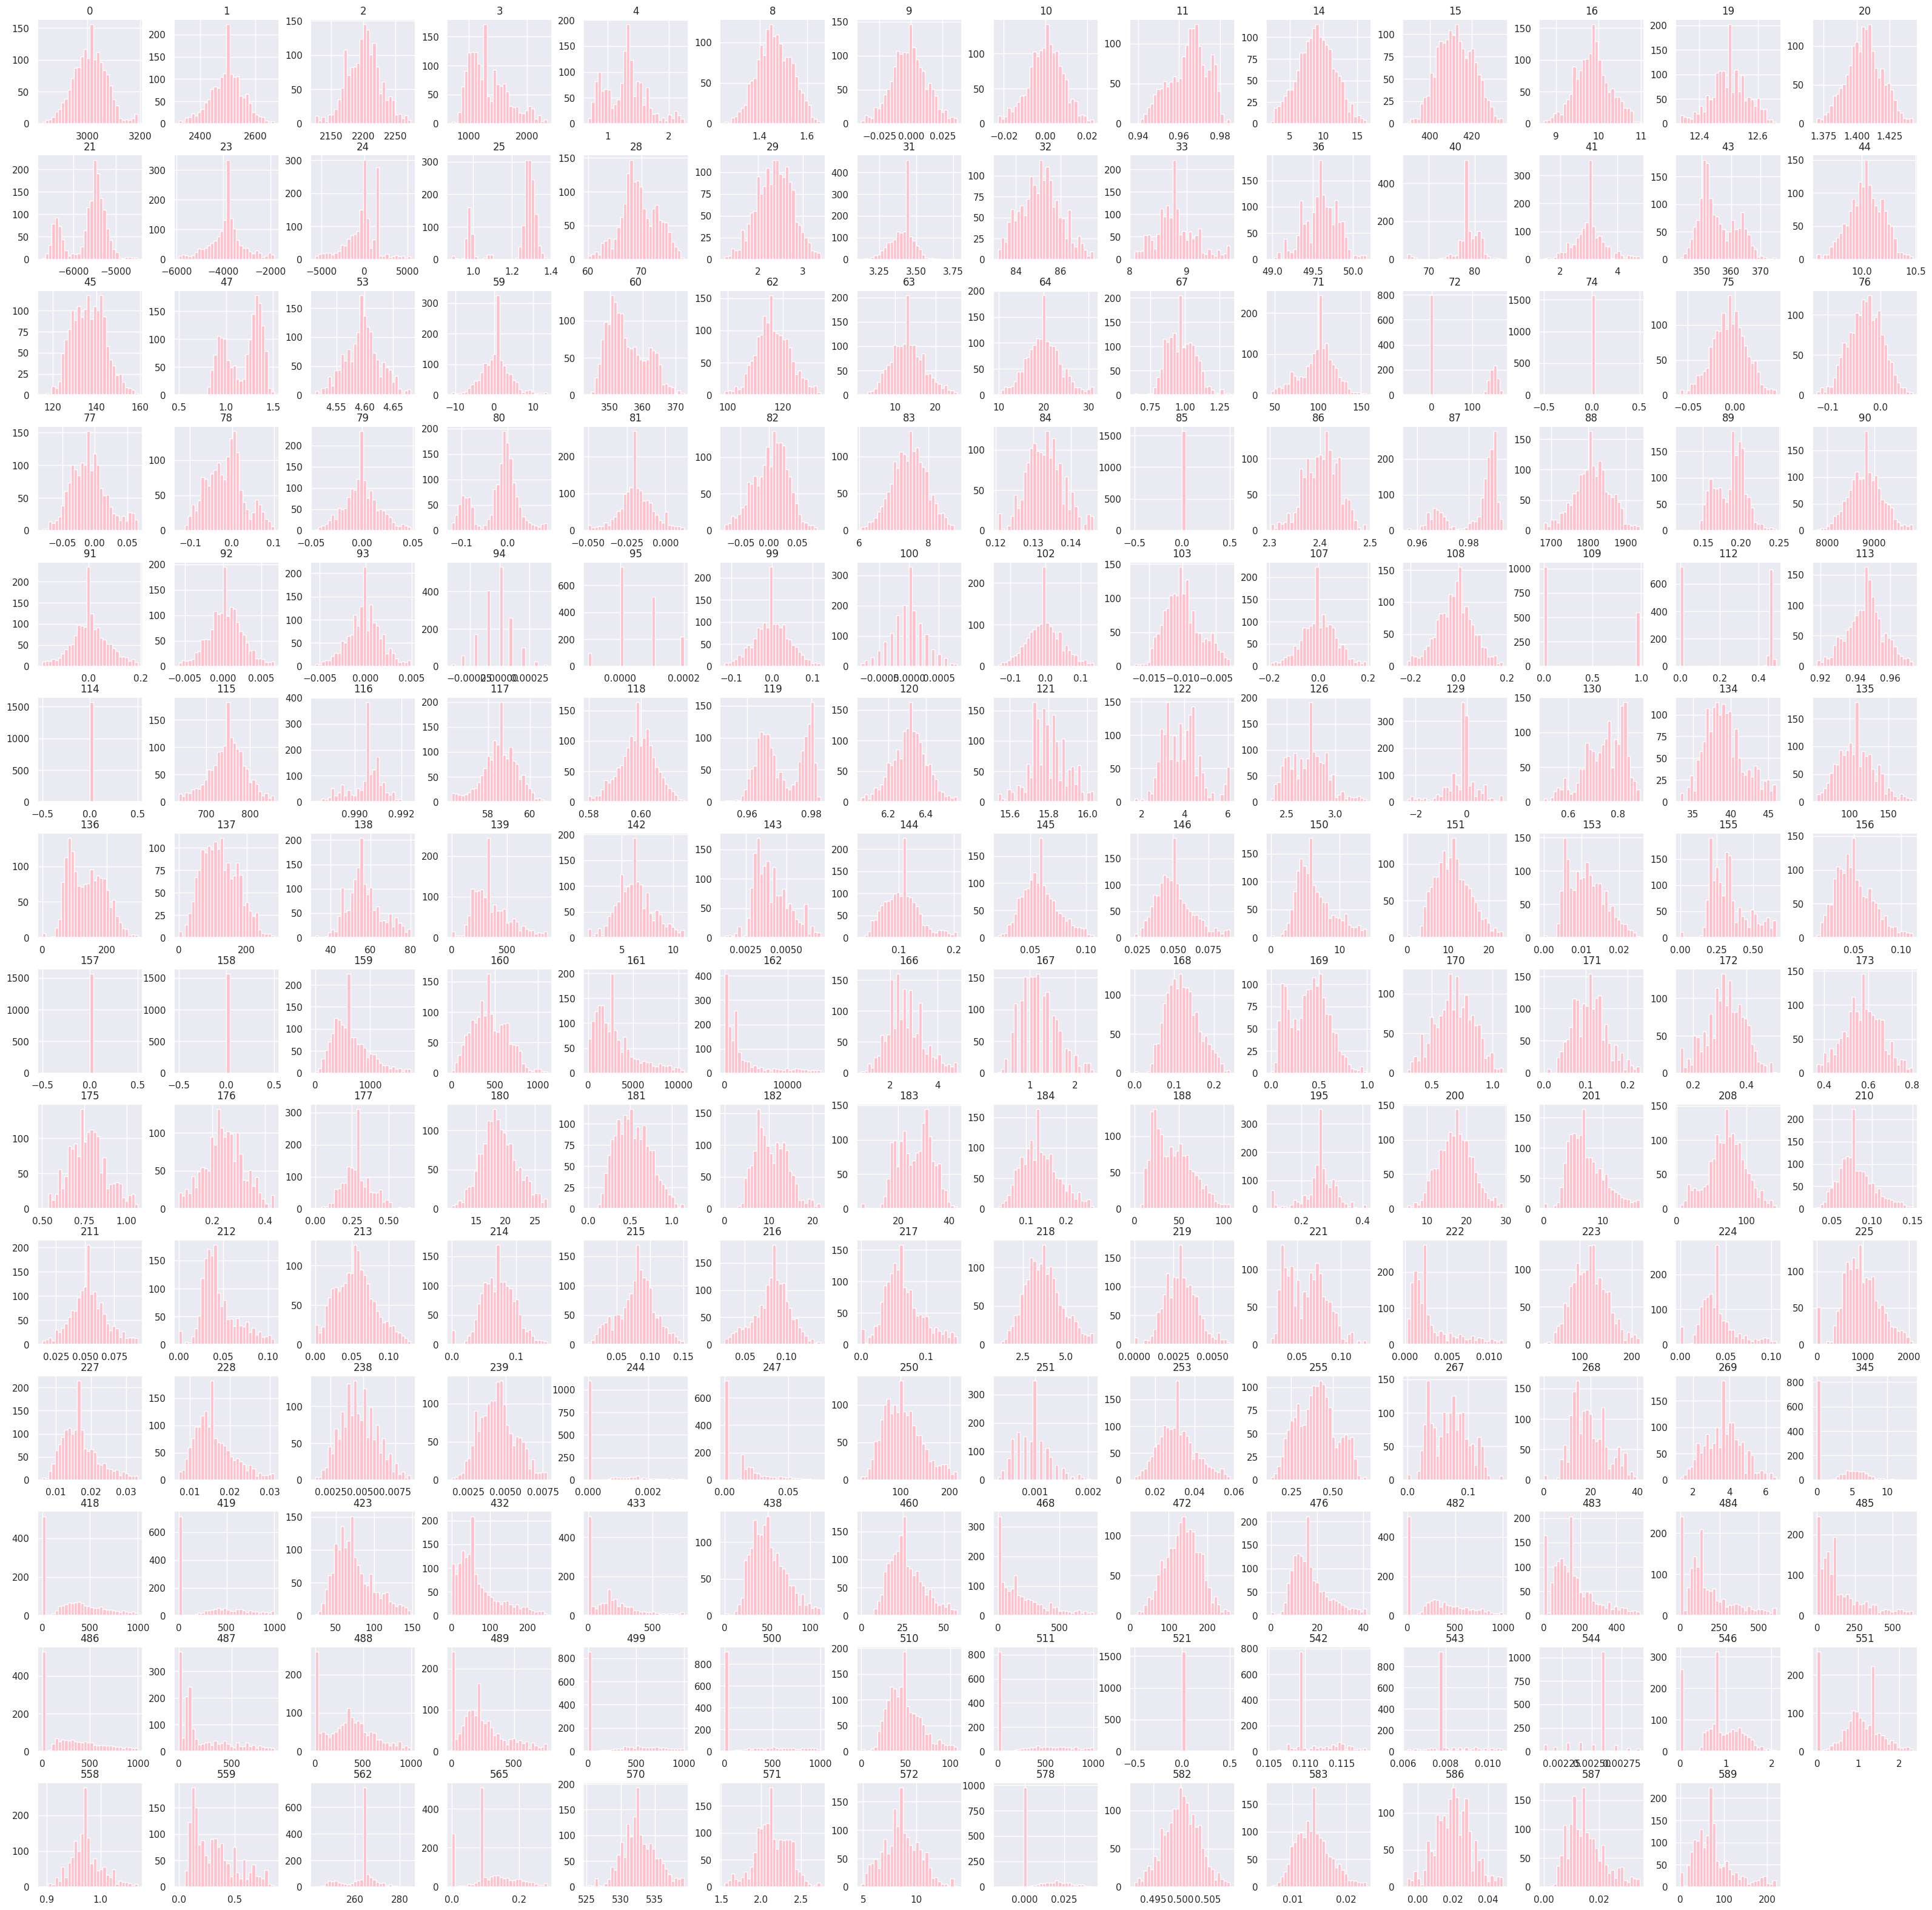

In [39]:
#plotting histogram to check for the frequency of values within a variable
com1.hist(bins = 30, figsize = (40, 40), color = 'pink')
plt.show()

**Some variables have still have 0 as a constant signal, will be drooping them after scaling with z-score**

In [40]:
#density plot to check for the distribution of the variables
plt.figure(figsize=(40, 40))
col = 1
for i in com1.columns:
    plt.subplot(20, 10, col)
    sns.distplot(com1[i], color = 'b')
    col += 1

Output hidden; open in https://colab.research.google.com to view.

**Majority of the variable seem to have a normal distribution**

In [41]:
#scaling with z-score
comScaled= com1.apply(zscore)
comScaled.describe().T

count          mean       std       min       25%       50%       75%  \
0    1567.0 -1.902187e-15  1.000319 -2.899903 -0.672689  0.019204  0.678857   
1    1567.0 -2.446883e-15  1.000319 -2.921819 -0.621101  0.033772  0.627439   
2    1567.0  5.559192e-15  1.000319 -2.911031 -0.699474  0.005639  0.646028   
3    1567.0  4.443726e-16  1.000319 -1.895521 -0.778479 -0.182909  0.619699   
4    1567.0  2.902025e-16  1.000319 -1.845115 -0.836008  0.041632  0.583103   
8    1567.0 -1.432875e-15  1.000319 -2.911482 -0.720608 -0.031336  0.733984   
9    1567.0 -2.267207e-17  1.000319 -2.739467 -0.669555  0.005966  0.648975   
10   1567.0  4.534414e-18  1.000319 -2.766399 -0.650815  0.030271  0.669166   
11   1567.0  3.990285e-16  1.000319 -2.898204 -0.708265  0.116375  0.717107   
14   1567.0  1.587045e-17  1.000319 -2.485880 -0.685749  0.004881  0.687843   
15   1567.0  3.038058e-16  1.000319 -2.723669 -0.751161 -0.034052  0.755551   
16   1567.0 -1.813766e-16  1.000319 -2.771114 -0.657297 -0.026510  0.615958   
19   1567.0 -1.050170e-14  1.000319 -2.622844 -0.585475 -0.036832  0.684736   
20   1567.0  1.300470e-14  1.000319 -2.682234 -0.664849  0.010113  0.666325   
21   1567.0 -6.529557e-16  1.000319 -2.411509 -0.469011  0.318792  0.662331   
23   1567.0 -1.178948e-16  1.000319 -2.822879 -0.466490  0.042391  0.426157   
24   1567.0  0.000000e+00  1.000319 -2.971431 -0.507643  0.068650  0.796220   
25   1567.0  1.015709e-15  1.000319 -2.544364  0.190535  0.448861  0.611172   
28   1567.0  1.451013e-16  1.000319 -2.771124 -0.623442 -0.112564  0.798589   
29   1567.0 -7.073686e-16  1.000319 -2.843925 -0.734041  0.007318  0.705823   
31   1567.0  2.711580e-15  1.000319 -3.759292 -0.578216  0.331722  0.447569   
32   1567.0  2.303483e-14  1.000319 -2.155540 -0.696174  0.018108  0.665202   
33   1567.0  4.996925e-15  1.000319 -2.094964 -0.640901 -0.091149  0.570988   
36   1567.0  3.845183e-15  1.000319 -3.009208 -0.732362  0.031805  0.733840   
40   1567.0 -2.539272e-16  1.000319 -4.520702 -0.185876 -0.065272  0.592877   
41   1567.0  8.161946e-17  1.000319 -2.995732 -0.549270  0.063277  0.457987   
43   1567.0  3.301054e-15  1.000319 -2.067215 -0.761311 -0.288742  0.846268   
44   1567.0  2.684373e-15  1.000319 -2.877478 -0.659847 -0.024877  0.715605   
45   1567.0 -1.224292e-15  1.000319 -2.859525 -0.784424 -0.029997  0.722613   
47   1567.0  4.307694e-16  1.000319 -3.594805 -1.018360  0.383040  0.855801   
53   1567.0  6.856035e-15  1.000319 -2.713786 -0.699767 -0.017600  0.599599   
59   1567.0  0.000000e+00  1.000319 -3.045702 -0.592591  0.088726  0.490864   
60   1567.0  2.362430e-15  1.000319 -2.014340 -0.781099 -0.242869  0.762960   
62   1567.0  1.904454e-15  1.000319 -2.832103 -0.674412 -0.055777  0.673557   
63   1567.0 -7.255063e-17  1.000319 -2.826384 -0.698152 -0.006264  0.622200   
64   1567.0  4.262350e-16  1.000319 -2.656921 -0.669924  0.008577  0.608280   
67   1567.0 -1.088259e-15  1.000319 -3.382870 -0.760948  0.023876  0.688997   
71   1567.0 -1.451013e-16  1.000319 -2.731433 -0.557849  0.159159  0.610878   
72   1567.0  5.441297e-17  1.000319 -1.752248 -0.972458 -0.972458  1.023133   
74      0.0           NaN       NaN       NaN       NaN       NaN       NaN   
75   1567.0  3.627532e-17  1.000319 -2.851148 -0.670029 -0.001444  0.661660   
76   1567.0 -5.441297e-17  1.000319 -2.898549 -0.693277  0.002959  0.727549   
77   1567.0  0.000000e+00  1.000319 -2.555503 -0.733845 -0.030223  0.542903   
78   1567.0  0.000000e+00  1.000319 -2.539769 -0.732646  0.065011  0.577630   
79   1567.0  3.627532e-17  1.000319 -2.704748 -0.620104  0.011517  0.586796   
80   1567.0  3.627532e-17  1.000319 -2.237912 -0.444754  0.268484  0.606099   
81   1567.0 -5.441297e-17  1.000319 -2.903384 -0.543854 -0.068218  0.575291   
82   1567.0 -1.360324e-17  1.000319 -2.695140 -0.681601  0.108185  0.710086   
83   1567.0 -7.799193e-16  1.000319 -2.802242 -0.690057  0.024460  0.701980   
84   1567.0 -1.334251e-15  1.000319 -2.595169 -0.668858 

In [42]:
#combining the data
y=com['Pass/Fail']
comb=pd.concat([comScaled,y],axis=1)

In [43]:
#dropping NaN
comb.dropna(axis=1,inplace=True)
row,column=comb.shape
print('After dropping NaN variables the dataset contains', row, 'rows and', column, 'columns')

After dropping NaN variables the dataset contains 1567 rows and 190 columns


After dropping NaN variables the dataset contains 1585 rows and 188 columns


In [44]:
#splitting the dataset into train and validation set
X=comb.iloc[0:1567,:]
val=comb.iloc[1567:,:] # Select all columns for validation set
val=val.drop(['Pass/Fail'],axis=1, errors='ignore') # Ignore error if 'Pass/Fail' not found

In [45]:
#creating a copy of the train data and seperating the target column and the predictor variables
sg=X.copy()
X=sg.drop(['Pass/Fail'],axis=1)
y=sg['Pass/Fail']

In [46]:
row,column=val.shape
print('The reduced validation dataset contains', row, 'rows and', column, 'columns')

The reduced validation dataset contains 0 rows and 189 columns


The reduced validation dataset contains 18 rows and 187 columns

In [47]:
row,column=X.shape
print('The reduced training dataset contains', row, 'rows and', column, 'columns')

The reduced training dataset contains 1567 rows and 189 columns


## Trying various algorithms along with different sampling techniques
### Splitting the Past data into train and test 70:30 ratio


In [48]:
# splitting data training dataset into train and test set for independent attributes
X_train, X_test, Y_train, Y_test =train_test_split(X,y, test_size=.30,random_state=105,stratify=y)

In [49]:
print("Training Fail    : {0} ({1:0.2f}%)".format(len(Y_train[Y_train[:] == 1]), (len(Y_train[Y_train[:] == 1])/len(Y_train)) * 100))
print("Training Pass  : {0} ({1:0.2f}%)".format(len(Y_train[Y_train[:] == 0]), (len(Y_train[Y_train[:] == 0])/len(Y_train)) * 100))
print("")
print("Test Fail        : {0} ({1:0.2f}%)".format(len(Y_test[Y_test[:] == 1]), (len(Y_test[Y_test[:] == 1])/len(Y_test)) * 100))
print("Test Pass       : {0} ({1:0.2f}%)".format(len(Y_test[Y_test[:] == 0]), (len(Y_test[Y_test[:] == 0])/len(Y_test)) * 100))
print("")

Training Fail    : 73 (6.66%)
Training Pass  : 1023 (93.34%)

Test Fail        : 31 (6.58%)
Test Pass       : 440 (93.42%)



### No sampling

In [50]:
# Initializaing various classification algorithms with normal dataset and choosing the best model based on f1 score for tuning

models = []
models.append(("LR", LogisticRegression()))
models.append(("KNN", KNeighborsClassifier()))
models.append(("GNB", GaussianNB()))
models.append(("SVM", SVC(kernel='linear')))
models.append(("DT", DecisionTreeClassifier()))
models.append(("RF", RandomForestClassifier()))
models.append(("AB", AdaBoostClassifier()))
models.append(("GBT", GradientBoostingClassifier()))
models.append(("XGB", XGBClassifier(verbosity=0)))
models.append(("LightGBM",LGBMClassifier()))

#testing models
results = []
names = []

for name, model in models:
    kfold = StratifiedKFold(n_splits=10, random_state=55,shuffle=True)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='f1')
    results.append(cv_results)
    names.append(name)
    msg = '%s: %f%% (%f%%)' % (name, cv_results.mean()*100, cv_results.std()*100)
    print(msg)

LR: 11.928382% (11.162735%)
KNN: 2.500000% (7.500000%)
GNB: 17.263359% (5.554500%)
SVM: 16.345238% (9.904566%)
DT: 13.503310% (13.022822%)
RF: 0.000000% (0.000000%)
AB: 5.427350% (8.448254%)
GBT: 7.929293% (9.835008%)
XGB: 0.000000% (0.000000%)
[LightGBM] [Info] Number of positive: 66, number of negative: 920
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003066 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 39961
[LightGBM] [Info] Number of data points in the train set: 986, number of used features: 189
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.066937 -> initscore=-2.634719
[LightGBM] [Info] Start training from score -2.634719
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 66, number of negative: 920
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004227 seconds.
You can set `force_co

###  Random undersampling

In [52]:
from imblearn.under_sampling import RandomUnderSampler

# Implementing random under sampling
under = RandomUnderSampler(sampling_strategy=0.5)
# Use fit_resample instead of fit_sample
X_under, y_under = under.fit_resample(X_train, Y_train)

In [53]:
print("Under Training Fail    : {0} ({1:0.2f}%)".format(len(y_under[y_under[:] == 1]), (len(y_under[y_under[:] == 1])/len(y_under)) * 100))
print("under Training Pass  : {0} ({1:0.2f}%)".format(len(y_under[y_under[:] == 0]), (len(y_under[y_under[:] == 0])/len(y_under)) * 100))

Under Training Fail    : 73 (33.33%)
under Training Pass  : 146 (66.67%)


In [54]:
# Initializaing various classification algorithms with random under sampler dataset and choosing the best model based on f1 score

models = []
models.append(("LR", LogisticRegression()))
models.append(("KNN", KNeighborsClassifier()))
models.append(("GNB", GaussianNB()))
models.append(("SVM", SVC(kernel='linear')))
models.append(("DT", DecisionTreeClassifier()))
models.append(("RF", RandomForestClassifier()))
models.append(("AB", AdaBoostClassifier()))
models.append(("GBT", GradientBoostingClassifier()))
models.append(("XGB", XGBClassifier(verbosity=0)))
models.append(("LightGBM",LGBMClassifier()))

#testing models
results = []
names = []

for name, model in models:
    kfold = StratifiedKFold(n_splits=10, random_state=66,shuffle=True)
    cv_results = cross_val_score(model, X_under, y_under, cv=kfold, scoring='f1')
    results.append(cv_results)
    names.append(name)
    msg = '%s: %f%% (%f%%)' % (name, cv_results.mean()*100, cv_results.std()*100)
    print(msg)

LR: 42.536496% (14.881169%)
KNN: 38.867355% (19.325177%)
GNB: 50.532828% (16.293553%)
SVM: 44.275431% (14.298712%)
DT: 39.923443% (13.204659%)
RF: 13.858586% (19.737115%)
AB: 34.168354% (16.315305%)
GBT: 36.170163% (15.092156%)
XGB: 36.393773% (22.716717%)
[LightGBM] [Info] Number of positive: 66, number of negative: 131
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000815 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 10376
[LightGBM] [Info] Number of data points in the train set: 197, number of used features: 189
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.335025 -> initscore=-0.685543
[LightGBM] [Info] Start training from score -0.685543
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No furth

###  Smote

In [55]:
# Implementing SMOTE
from imblearn.over_sampling import SMOTE

smt = SMOTE(sampling_strategy=0.5)
# Use fit_resample instead of fit_sample
X_SMOTE, y_SMOTE = smt.fit_resample(X_train, Y_train)

In [56]:
print("SMOTE Training Fail    : {0} ({1:0.2f}%)".format(len(y_SMOTE[y_SMOTE[:] == 1]), (len(y_SMOTE[y_SMOTE[:] == 1])/len(y_SMOTE)) * 100))
print("SMOTE Training Pass  : {0} ({1:0.2f}%)".format(len(y_SMOTE[y_SMOTE[:] == 0]), (len(y_SMOTE[y_SMOTE[:] == 0])/len(y_SMOTE)) * 100))

SMOTE Training Fail    : 511 (33.31%)
SMOTE Training Pass  : 1023 (66.69%)


In [57]:
# Initializaing various classification algorithms with Smote dataset and choosing the best model based on f1 score

models = []
models.append(("LR", LogisticRegression()))
models.append(("KNN", KNeighborsClassifier()))
models.append(("GNB", GaussianNB()))
models.append(("SVM", SVC(kernel='linear')))
models.append(("DT", DecisionTreeClassifier()))
models.append(("RF", RandomForestClassifier()))
models.append(("AB", AdaBoostClassifier()))
models.append(("GBT", GradientBoostingClassifier()))
models.append(("XGB", XGBClassifier(verbosity=0)))
models.append(("LightGBM",LGBMClassifier()))

#testing models
results = []
names = []


for name, model in models:
    kfold = StratifiedKFold(n_splits=10, random_state=25,shuffle=True)
    cv_results = cross_val_score(model, X_SMOTE, y_SMOTE, cv=kfold, scoring='f1')
    results.append(cv_results)
    names.append(name)
    msg = '%s: %f%% (%f%%)' % (name, cv_results.mean()*100, cv_results.std()*100)
    print(msg)

LR: 87.405086% (2.187248%)
KNN: 53.832617% (0.790200%)
GNB: 79.005152% (6.531221%)
SVM: 88.509930% (1.946231%)
DT: 83.085117% (3.929936%)
RF: 96.958809% (1.322132%)
AB: 88.154110% (2.842924%)
GBT: 94.867213% (2.286280%)
XGB: 97.143136% (1.219506%)
[LightGBM] [Info] Number of positive: 460, number of negative: 920
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003710 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 46647
[LightGBM] [Info] Number of data points in the train set: 1380, number of used features: 189
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.333333 -> initscore=-0.693147
[LightGBM] [Info] Start training from score -0.693147
[LightGBM] [Info] Number of positive: 460, number of negative: 920
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005855 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 466

### Random Oversampling

In [58]:
# Implementing random over sampling
from imblearn.over_sampling import RandomOverSampler

over= RandomOverSampler(sampling_strategy=0.5)
# Use fit_resample instead of fit_sample
X_over, y_over= over.fit_resample(X_train, Y_train)

In [59]:
print("over Training Fail    : {0} ({1:0.2f}%)".format(len(y_over[y_over[:] == 1]), (len(y_over[y_over[:] == 1])/len(y_over)) * 100))
print("over Training Pass  : {0} ({1:0.2f}%)".format(len(y_over[y_over[:] == 0]), (len(y_over[y_over[:] == 0])/len(y_over)) * 100))


over Training Fail    : 511 (33.31%)
over Training Pass  : 1023 (66.69%)


In [60]:
# Initializaing various classification algorithms with over sampled dataset and choosing the best model based on f1 score

models = []
models.append(("LR", LogisticRegression()))
models.append(("KNN", KNeighborsClassifier()))
models.append(("GNB", GaussianNB()))
models.append(("SVM", SVC(kernel='linear')))
models.append(("DT", DecisionTreeClassifier()))
models.append(("RF", RandomForestClassifier()))
models.append(("AB", AdaBoostClassifier()))
models.append(("GBT", GradientBoostingClassifier()))
models.append(("XGB", XGBClassifier(verbosity=0)))
models.append(("LightGBM",LGBMClassifier()))

#testing models
results = []
names = []


for name, model in models:
    kfold = StratifiedKFold(n_splits=10, random_state=69,shuffle=True)
    cv_results = cross_val_score(model, X_over, y_over, cv=kfold, scoring='f1')
    results.append(cv_results)
    names.append(name)
    msg = '%s: %f%% (%f%%)' % (name, cv_results.mean()*100, cv_results.std()*100)
    print(msg)

LR: 87.795608% (3.081365%)
KNN: 86.794283% (1.745601%)
GNB: 64.083221% (6.019485%)
SVM: 88.695546% (2.350971%)
DT: 92.605357% (1.803294%)
RF: 100.000000% (0.000000%)
AB: 91.652698% (2.616752%)
GBT: 98.462716% (1.544300%)
XGB: 99.613518% (0.639510%)
[LightGBM] [Info] Number of positive: 460, number of negative: 920
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004535 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 40350
[LightGBM] [Info] Number of data points in the train set: 1380, number of used features: 189
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.333333 -> initscore=-0.693147
[LightGBM] [Info] Start training from score -0.693147
[LightGBM] [Info] Number of positive: 460, number of negative: 920
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003885 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 40

### ADASYN sampling

In [61]:
oversample = ADASYN(sampling_strategy=0.5)
X_adasyn, y_adasyn = oversample.fit_resample(X_train, Y_train)

In [62]:
print("ADASYN Training Fail    : {0} ({1:0.2f}%)".format(len(y_adasyn[y_adasyn[:] == 1]), (len(y_adasyn[y_adasyn[:] == 1])/len(y_adasyn)) * 100))
print("ADASYN Training Pass  : {0} ({1:0.2f}%)".format(len(y_adasyn[y_adasyn[:] == 0]), (len(y_adasyn[y_adasyn[:] == 0])/len(y_adasyn)) * 100))

ADASYN Training Fail    : 504 (33.01%)
ADASYN Training Pass  : 1023 (66.99%)


In [63]:
# Initializaing various classification algorithms with ADASYN dataset and choosing the best model based on f1 score

models = []
models.append(("LR", LogisticRegression()))
models.append(("KNN", KNeighborsClassifier()))
models.append(("GNB", GaussianNB()))
models.append(("SVM", SVC(kernel='linear')))
models.append(("DT", DecisionTreeClassifier()))
models.append(("RF", RandomForestClassifier()))
models.append(("AB", AdaBoostClassifier()))
models.append(("GBT", GradientBoostingClassifier()))
models.append(("XGB", XGBClassifier(verbosity=0)))
models.append(("LightGBM",LGBMClassifier()))

#testing models
results = []
names = []


for name, model in models:
    kfold = StratifiedKFold(n_splits=10, random_state=33,shuffle=True)
    cv_results = cross_val_score(model, X_adasyn, y_adasyn, cv=kfold, scoring='f1')
    results.append(cv_results)
    names.append(name)
    msg = '%s: %f%% (%f%%)' % (name, cv_results.mean()*100, cv_results.std()*100)
    print(msg)

LR: 87.363572% (2.533623%)
KNN: 53.482124% (0.836368%)
GNB: 80.029330% (2.975774%)
SVM: 88.106608% (2.290427%)
DT: 84.343659% (2.675536%)
RF: 97.544223% (1.164225%)
AB: 87.315030% (4.176015%)
GBT: 95.206530% (0.930967%)
XGB: 97.791557% (1.261266%)
[LightGBM] [Info] Number of positive: 454, number of negative: 920
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004346 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 46637
[LightGBM] [Info] Number of data points in the train set: 1374, number of used features: 189
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.330422 -> initscore=-0.706276
[LightGBM] [Info] Start training from score -0.706276
[LightGBM] [Info] Number of positive: 454, number of negative: 920
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004379 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 466

### Gaussian Naive Bayes on Normal Dataset

In [64]:
nb = GaussianNB()
nb.fit(X_train, Y_train)

GaussianNB()

In [65]:
modelnb_score = nb.score(X_train, Y_train)
print('Accuracy Score of Training Data: ', modelnb_score)

Accuracy Score of Training Data:  0.8640510948905109


In [66]:
# Import the necessary library for metrics
from sklearn import metrics

# Assuming you have X_test available
# Predict using your trained model (nb)
y_predictnb = nb.predict(X_test)

#printing classification report
print("Classification Report")
print(metrics.classification_report(Y_test, y_predictnb, labels=[1, 0]))

Classification Report
              precision    recall  f1-score   support

           1       0.21      0.45      0.28        31
           0       0.96      0.88      0.92       440

    accuracy                           0.85       471
   macro avg       0.58      0.66      0.60       471
weighted avg       0.91      0.85      0.87       471



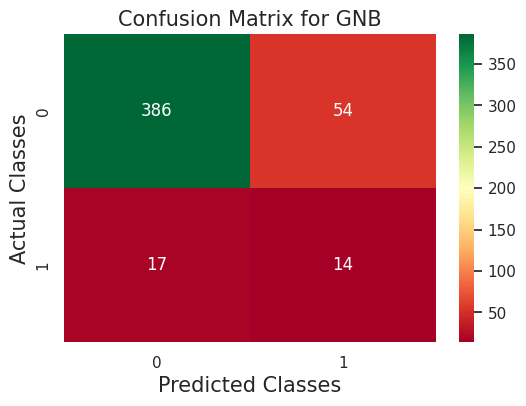

In [67]:
# visualizing confusion matrix
cm= confusion_matrix(Y_test, y_predictnb)
plt.figure(figsize = (6, 4))
sns.heatmap(cm, annot = True, cmap = 'RdYlGn', fmt = 'd')
plt.xlabel('Predicted Classes', fontsize = 15)
plt.ylabel('Actual Classes', fontsize = 15)
plt.title('Confusion Matrix for GNB', fontsize = 15);

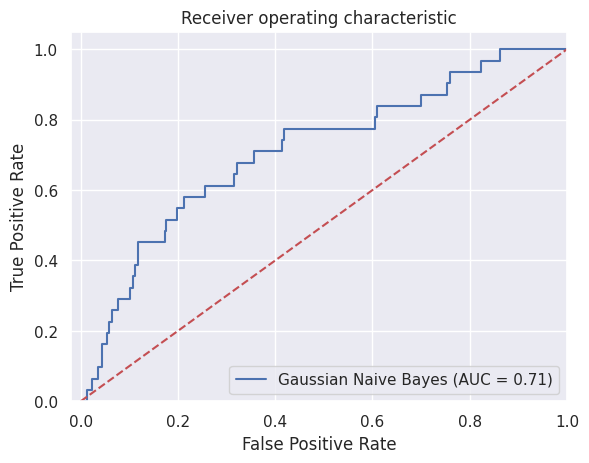

In [68]:
#Plotting ROC and AUC
probs = nb.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(Y_test, preds)
roc_auc_nb = metrics.auc(fpr, tpr)
plt.plot(fpr, tpr, label='Gaussian Naive Bayes (AUC = %0.2f)' % roc_auc_nb)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.02, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [69]:
i = np.arange(len(tpr)) # index for df
roc = pd.DataFrame({'fpr' : pd.Series(fpr, index=i),'tpr' : pd.Series(tpr, index = i), '1-fpr' : pd.Series(1-fpr, index = i), 'tf' : pd.Series(tpr - (1-fpr), index = i), 'threshold' : pd.Series(threshold, index = i)})
print(roc.loc[(roc.tf-0).abs().argsort()[:1]])

         fpr       tpr     1-fpr        tf  threshold
39  0.320455  0.677419  0.679545 -0.002126   0.014717


In [70]:
from sklearn.preprocessing import binarize
import numpy as np

# store the predicted probabilities for Failed Class.
y_pred_prob = nb.predict_proba(X_test)[:, 1]
# Reshape y_pred_prob to a 2D array with one column
y_pred_prob = y_pred_prob.reshape(-1, 1)

# predict diabetes if the predicted probability is greater than 0.0161
# The binarize function expects a NumPy array, not a list containing the array.
# Removing the square brackets around y_pred_prob fixes the error
# Use the threshold keyword argument to specify the threshold value
y_pred_class = binarize(y_pred_prob, threshold=0.0161)
#As the output will be single dimensional, removing index [0]

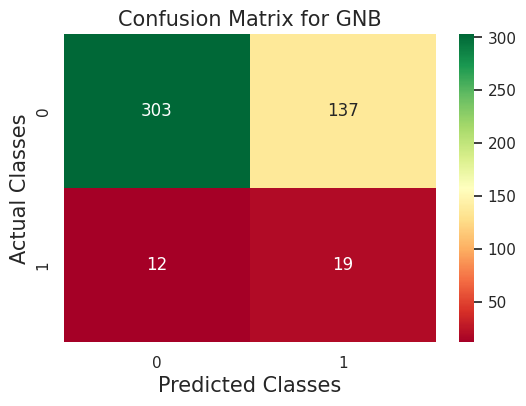

In [71]:
# visualizing confusion matrix
cm= confusion_matrix(Y_test, y_pred_class)
plt.figure(figsize = (6, 4))
sns.heatmap(cm, annot = True, cmap = 'RdYlGn', fmt = 'd')
plt.ylabel('Actual Classes', fontsize = 15)
plt.xlabel('Predicted Classes', fontsize = 15)
plt.title('Confusion Matrix for GNB', fontsize = 15);

In [72]:
#printing classification report
print("Classification Report")
print(metrics.classification_report(Y_test, y_pred_class, labels=[1, 0]))

Classification Report
              precision    recall  f1-score   support

           1       0.12      0.61      0.20        31
           0       0.96      0.69      0.80       440

    accuracy                           0.68       471
   macro avg       0.54      0.65      0.50       471
weighted avg       0.91      0.68      0.76       471



In [73]:
precision_nb, recall_nb, f1_score_nb, support = precision_recall_fscore_support(Y_test, y_pred_class, average = 'macro')
print('Precision Score :', '%0.2f' % precision_nb)
print('Recall Score :', '%0.2f' % recall_nb)
print('F1-Score:', '%0.2f' % f1_score_nb)
nb_acc= accuracy_score(Y_test, y_predictnb)
print('Accuracy Score :','%0.2f' % nb_acc)
print('AUC :','%0.2f' % roc_auc_nb)
print('Thresholdnb :','%0.2f' % 0.016)
Thresholdnb=0.016

Precision Score : 0.54
Recall Score : 0.65
F1-Score: 0.50
Accuracy Score : 0.85
AUC : 0.71
Thresholdnb : 0.02


### Gaussian Naive Bayes on Under sampled Data

In [74]:
nbu = GaussianNB()
nbu.fit(X_under, y_under)

GaussianNB()

In [75]:
modelnbu_score = nbu.score(X_under,y_under)
print('Accuracy Score of Training Data: ', modelnbu_score)

Accuracy Score of Training Data:  0.8264840182648402


In [76]:
y_predictnbu= nbu.predict(X_test)
modelnbu_score = accuracy_score(Y_test, y_predictnbu)
print('Accuracy Score of Test Data:', modelnbu_score)

Accuracy Score of Test Data: 0.7261146496815286


In [77]:
#printing classification report
print("Classification Report")
print(metrics.classification_report(Y_test, y_predictnbu, labels=[1, 0]))

Classification Report
              precision    recall  f1-score   support

           1       0.13      0.58      0.22        31
           0       0.96      0.74      0.83       440

    accuracy                           0.73       471
   macro avg       0.55      0.66      0.53       471
weighted avg       0.91      0.73      0.79       471



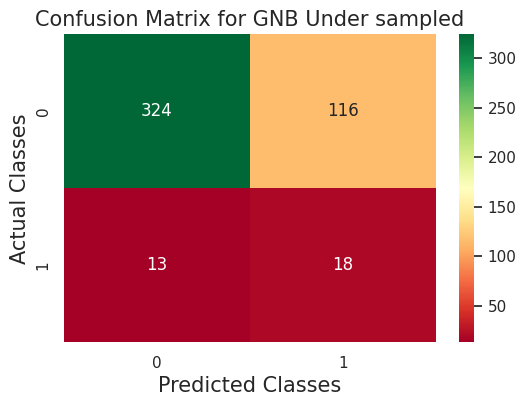

In [78]:
# visualizing confusion matrix
cm= confusion_matrix(Y_test, y_predictnbu)
plt.figure(figsize = (6, 4))
sns.heatmap(cm, annot = True, cmap = 'RdYlGn', fmt = 'd')
plt.ylabel('Actual Classes', fontsize = 15)
plt.xlabel('Predicted Classes', fontsize = 15)
plt.title('Confusion Matrix for GNB Under sampled', fontsize = 15);

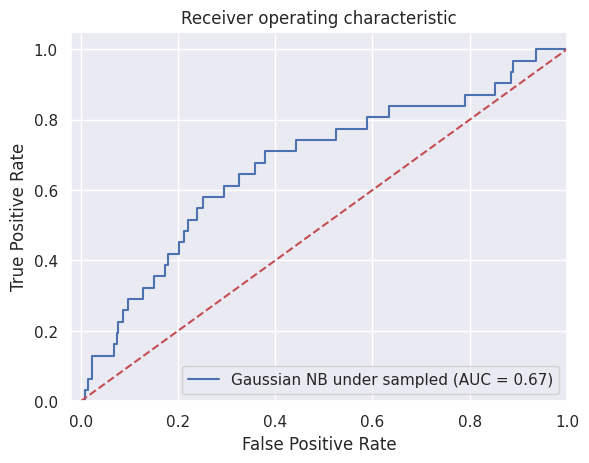

In [79]:
#Plotting ROC and AUC
probs = nbu.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(Y_test, preds)
roc_auc_nbu = metrics.auc(fpr, tpr)
plt.plot(fpr, tpr, label='Gaussian NB under sampled (AUC = %0.2f)' % roc_auc_nbu)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.02, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [80]:
i = np.arange(len(tpr)) # index for df
roc = pd.DataFrame({'fpr' : pd.Series(fpr, index=i),'tpr' : pd.Series(tpr, index = i), '1-fpr' : pd.Series(1-fpr, index = i), 'tf' : pd.Series(tpr - (1-fpr), index = i), 'threshold' : pd.Series(threshold, index = i)})
print(roc.loc[(roc.tf-0).abs().argsort()[:1]])

         fpr       tpr     1-fpr        tf  threshold
40  0.359091  0.645161  0.640909  0.004252   0.122006


In [81]:
from sklearn.preprocessing import binarize
import numpy as np

# store the predicted probabilities for failed class
y_pred_prob = nbu.predict_proba(X_test)[:, 1]
# predict fail if the predicted probability is greater than 0.4753

# Instead of using binarize, directly apply the threshold:
y_pred_class = (y_pred_prob > 0.4753).astype(int)

# y_pred_class will now contain 1 where the probability is above the threshold,
# and 0 otherwise, achieving the same result as intended with binarize.

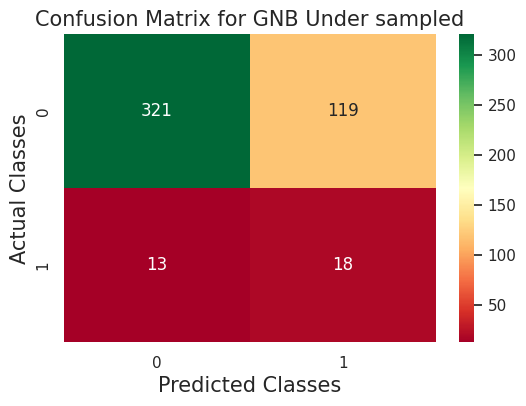

In [82]:
# visualizing confusion matrix
cm= confusion_matrix(Y_test, y_pred_class)
plt.figure(figsize = (6, 4))
sns.heatmap(cm, annot = True, cmap = 'RdYlGn', fmt = 'd')
plt.ylabel('Actual Classes', fontsize = 15)
plt.xlabel('Predicted Classes', fontsize = 15)
plt.title('Confusion Matrix for GNB Under sampled', fontsize = 15);

### Conclusion:

Based on the overall analysis and performances of the model we can go ahead and narrow down the observation that are common to the all the validations sets and infer that these are likely to fail. This definetly needs to be checked with a domain specialist to get an acceptable threshold limit of the Type 2 error rate and would be able choose the best performing model based on that, As far as PCA is considered, the models does better without it, Random Forest with Random overrsampling gives the best overall results.